# 06 - Scalability

If you remember our very first class, it was mentioned that python is a well supported, beginner friendly language. However, python was not that good at "scalability".

In [1]:
import IPython
url = 'http://www.bestprogramminglanguagefor.me/why-learn-python'
IPython.display.IFrame(url, 400, 250)

Scalability is a concept originally introduced in economy. It is, [according to wikipedia](https://en.wikipedia.org/wiki/Scalability), _"[...]the property of a system to handle a growing amount of work by adding resources to the system."_

In an economics settings, and speaking in simple terms, a _scalable process_ is a process whose output has a direct and proportional relationship with its input. Let's say there is a manufacturing company that produces chairs. If the company receives 1 ton of wood in a day, it can output 1000 chairs. If the company receives 2 tonnes, then it produces 2000 chairs. If it receives 3 tonnes, then 3000 chairs. In the range of inputs we have seen so far, it seems the company can __scale up production__ perfectly. However, let's say the company now receives 4 tonnes. If it is too much for the transformation process, a __bottleneck__ will occur in the production cycle. The company now can output 3500 chairs. The process still scales at this range but poorly. If we keep increasing the wood, one of two things can happen. The company gets more workers and machines for the assembly line, or it just caps at 3500. 

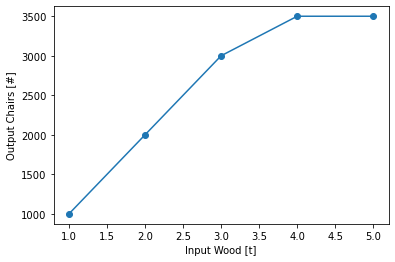

In [2]:
import matplotlib.pyplot as plt

tonnes = [1, 2, 3, 4, 5]
chairs = [1000, 2000, 3000, 3500, 3500]

plt.plot(tonnes, chairs, linestyle='-', marker='o')
plt.ylabel("Output Chairs [#]")
plt.xlabel("Input Wood [t]")
plt.show()

In computer science, the underlying way of thinking is pretty much the same. The resources are now disk space, computer memory, and processing cores (CPU, GPU, TPU, etc.). A scalable process is capable of allocating the resources it needs, when it needs them.

Each line of code in python is actually several hundred intructions (or more). Although the code might look simple to use, the more you code and the more you create features, interplayability between methods, variables, and so on, the more processor/memory you will need. You run out of memory fast and, at some point, an additional calculation will come with an amazing overhead.

Some languages like __C/C++__ and __Java__ can overcome such obstacles due to their nature, but are hard for beginners.

Built on top of the __Java__ ecosystem, we have other languages that attempt to bridge the divide between __scalability__ and __beginner-friendlyness__. Such are the examples of __Scala__ and __spark__.
* https://www.scala-lang.org/
* https://spark.apache.org/

---
## pyspark

__Disclaimer__: this class is a crash-course on pyspark. Spark itself is an incredibly complex and complete infrastructure. We will learn the more practical aspects of pyspark.

<div class="alert alert-warning">
    <b> pyspark is not python! The default writing style is camelCase. PEP8 is not enforced here.<b>
</div>

Pyspark is a python interface for spark. [Spark](https://spark.apache.org/) is a distributed Big-Data open-source infrastructure.

Pyspark combines the user-friendliness of python with the scalability of spark.

Spark's flagship concept is the [RDD](https://spark.apache.org/docs/latest/rdd-programming-guide.html), the _Resilient Distributed Dataset_ (or _Resilient Distributed Dataframe_). It is a fault tolerant set of elements that can be operated in parallel. From now on, we'll just call them __spark dataframes__.

Unlike pandas, spark dataframes have very little ammenities: no index, no plotting methods, no markdown previews, the list goes on. The handling of spark dataframes is also more complex than the pandas counterpart. So are spark dataframes just a user-unfriendly pandas? You may get that opinion today, but under the hood, they can be used in large clusters to perform many operations.

<div class="alert alert-info">
    <b>"Spark" is the big-data infrastructure. "Pyspark" is an interpretation layer capable of receiving python commands and turn them into spark instructions.<b>
</div>

Every spark instance needs an entry point into the cluster. The configuration for this has some complexity. If you installed pyspark via conda or pip, you have it automaticaly configured for the cluster to be your PC.

The entry point object is called __Spark Context__. We need to start a session in the cluster to start performing calculations:

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('adpro').getOrCreate()## Remember: When you create a session in a cluster, it is possible for a sysadmin to follow your resource usage.

Spark offers a way to monitor your resources. Open up a browser at __[localhost:4040](localhost:4040)__ and explore the application UI.

Now let's declare a dataframe:

In [2]:
simpleEntries = [('Duck', 6, True, 'pond'),
                 ('Goose', 5, True, 'farm'),
                 ('Dog', 4, False, 'farm'),
                 ('Wolf', 5, False, 'woods')]

exampleTableA = spark.createDataFrame(simpleEntries, ['name', 'speed', 'flies', 'place'])

In [3]:
exampleTableA.printSchema()

root
 |-- name: string (nullable = true)
 |-- speed: long (nullable = true)
 |-- flies: boolean (nullable = true)
 |-- place: string (nullable = true)



In [4]:
exampleTableA.show() ## We'll see what show() is in a moment

Py4JJavaError: An error occurred while calling o39.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (WLT717041.corporativo.pt executor driver): java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessBuilder.start(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:165)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(Unknown Source)
	at java.lang.ProcessImpl.start(Unknown Source)
	... 31 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2253)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2202)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2201)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2201)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1078)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2440)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2382)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2371)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2202)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2223)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2242)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:472)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:772)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessBuilder.start(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:165)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(Unknown Source)
	at java.lang.ProcessImpl.start(Unknown Source)
	... 31 more


### Lazy vs Eager evaluation (or execution)

Python is the example of an __eager__ evaluation language. As soon as you enter a command that bounds a variable to a certain value, that bounding expression is evaluated. Every command gets executed right away.

In a __lazy__ evaluation language, some commands do not trigger memory handling. You can sequence several commands in a row without accessing the data at all. You are actually building a __DAG__(see Class 3) of transformations, that can be parallelized:

<img src="../Figures/sparkdag.png">

At the end of the DAG, you may trigger an action that will execute the DAG. RDDs work because spark can map all the info that needs to be used and keeps track of where it is and if it was already used.

Debugging in pyspark is hard, as you do not usually save in disk or store in memory the intermediate calculation steps.

### Transformations VS actions

Some operations add to the DAG. Others enforce the DAG is executed.

__Transformations__ build the DAG. No data is handled with a transformation. Some examples are:

* groupBy
* join
* union
* select
* filter

__Actions__ enforce the DAG to run. Examples are:

* show
* count
* toPandas
* write

### The show() action

Pyspark dataframes do not have a .head() method. Instead, they have a .show() method, which is an action. It executes your DAG and, by default, shows the top 20 lines.

### Ending a session

You should stop the context when you are done with your session.

Stop the context:

In [8]:
spark.stop()

---
## Laptop alternatives

If you don't have access to a computing cluster and need to analyse a several GB dataset, there are some alternatives:
 - [Dask](https://dask.org/)
 - [Vaex](https://vaex.io/)